In [13]:
from unet_zf import ZF_UNET_224
from keras.optimizers import Adam
from keras.layers import Conv2D
from keras.layers.core import Activation
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping, LambdaCallback,ModelCheckpoint, CSVLogger
import numpy as np

#own py
import streaming_unet_data
from utility_methods import collect_and_separate_labels, collect_labels,save_plots, save_plots_callback

In [2]:


model = ZF_UNET_224(weights='generator')
optim = Adam()
model.compile(optimizer=optim, loss='mse', metrics=['accuracy'])

In [3]:
model.summary()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.summary()

conv_out = Conv2D(3, (1, 1), padding='same')(model.layers[-1].output)
o = Activation('tanh', name='loss')(conv_out)

model2 = Model(input=model.input, output=[o])
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

O:\ProgrammingSoftwares\anaconda3\envs\tensor-cpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
O:\ProgrammingSoftwares\anaconda3\envs\tensor-cpu\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


In [4]:
model2.save('starting_unet.h5')

In [5]:
model2 = load_model('starting_unet.h5')

O:\ProgrammingSoftwares\anaconda3\envs\tensor-cpu\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
for layer in model2.layers[:-7]:
    layer.trainable = False

In [8]:
image_folder = 'O:/ProgrammingSoftwares/anaconda_projects/dp_nagyhazi/samples/images/'
patience=15
early_stopping=EarlyStopping(monitor='loss',patience=patience, verbose=1)
checkpointer=ModelCheckpoint(filepath='unet_test_weights.hdf5', monitor='loss', save_best_only=True, verbose=1)
csv_logger = CSVLogger('unet_test_training.log', append=True)

traain = streaming_unet_data.StreamingUnet_DataGenerator(image_folder,batch_size=16)

model2.compile('adam', 'mse')

O:\ProgrammingSoftwares\anaconda3\envs\tensor-cpu\lib\site-packages\keras_preprocessing\image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Length of image list:  28


In [9]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
history = model2.fit_generator(generator=traain,
                    validation_data=traain,
                    epochs=30,
                    callbacks=[csv_logger,checkpointer, early_stopping])

Epoch 1/30
1/1 [==============================] - 35s 35s/step - loss: 0.7246 - val_loss: 1.0004

Epoch 00001: loss improved from inf to 0.72455, saving model to unet_test_weights.hdf5
Epoch 2/30
1/1 [==============================] - 31s 31s/step - loss: 0.6027 - val_loss: 0.5407

Epoch 00002: loss improved from 0.72455 to 0.60270, saving model to unet_test_weights.hdf5
Epoch 3/30
1/1 [==============================] - 32s 32s/step - loss: 0.4883 - val_loss: 0.4303

Epoch 00003: loss improved from 0.60270 to 0.48834, saving model to unet_test_weights.hdf5
Epoch 4/30
1/1 [==============================] - 32s 32s/step - loss: 0.4291 - val_loss: 0.4681

Epoch 00004: loss improved from 0.48834 to 0.42907, saving model to unet_test_weights.hdf5
Epoch 5/30
1/1 [==============================] - 32s 32s/step - loss: 0.4117 - val_loss: 0.5394

Epoch 00005: loss improved from 0.42907 to 0.41168, saving model to unet_test_weights.hdf5
Epoch 6/30
1/1 [==============================] - 32s 32s/s

KeyboardInterrupt: 

Length of image list:  28
XMAX 254.9670559630107


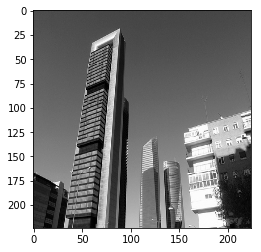

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


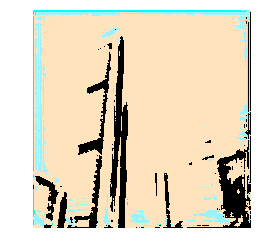

XMAX 254.96898804209172


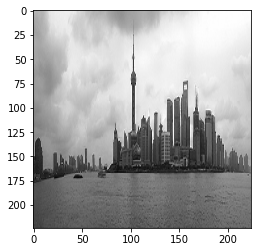

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


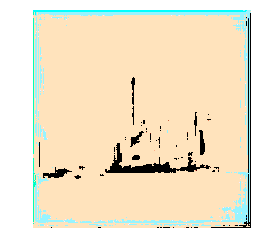

XMAX 254.6946532605229


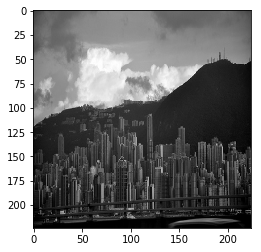

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


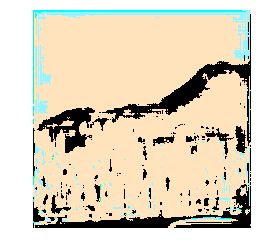

XMAX 245.21319309430763


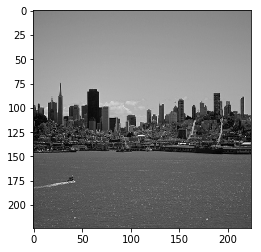

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


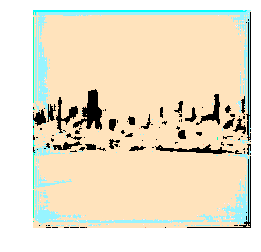

XMAX 250.92511895727026


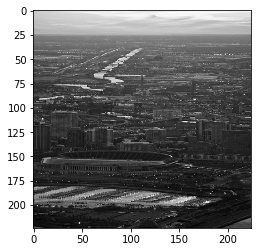

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


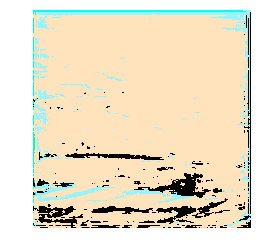

XMAX 254.60430795400197


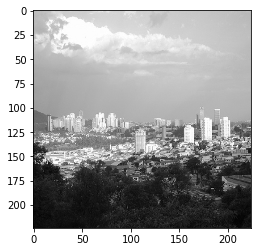

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


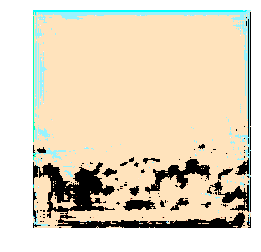

XMAX 254.04293728475778


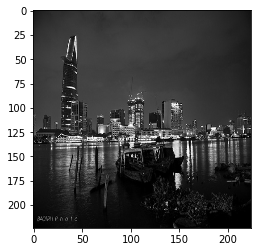

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


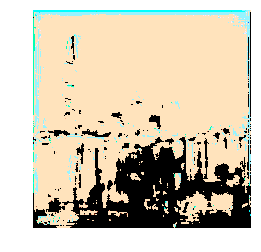

XMAX 235.8800402762275


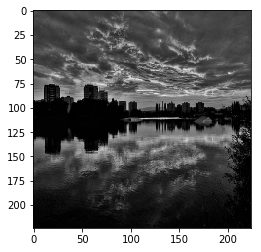

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


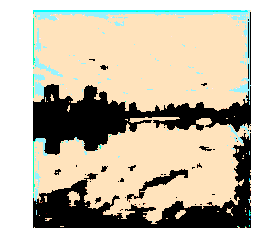

XMAX 254.94155673828107


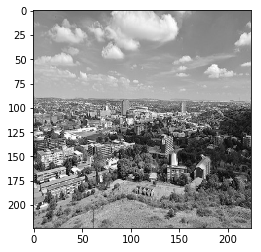

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


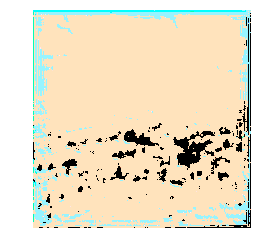

XMAX 192.84483541334652


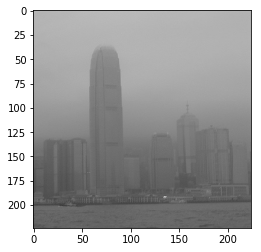

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


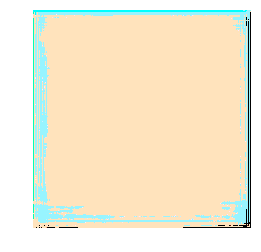

XMAX 234.22499283521998


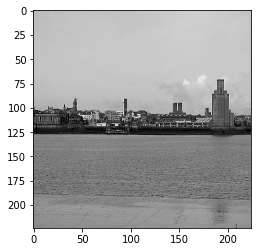

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


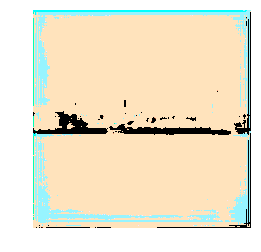

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


XMAX 255.00000000000003


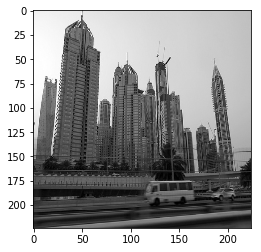

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


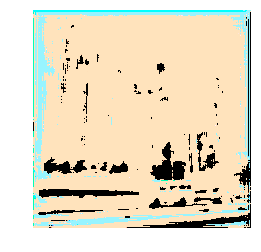

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


XMAX 255.00000000000003


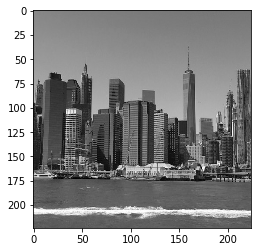

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


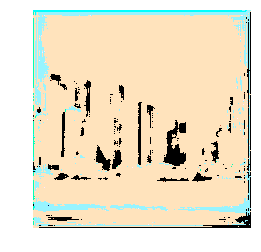

XMAX 254.5080086654979


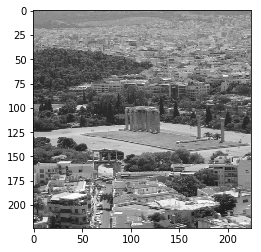

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


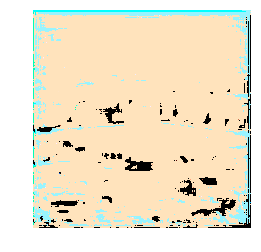

XMAX 183.11160714285725


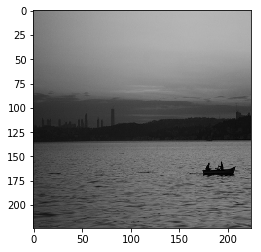

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


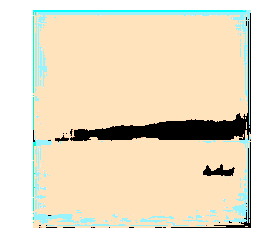

XMAX 191.3804456054685


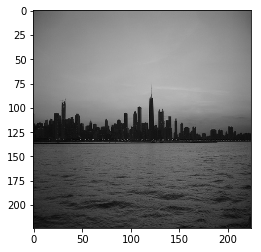

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


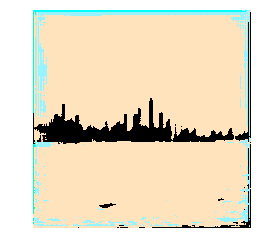

XMAX 254.48791204360484


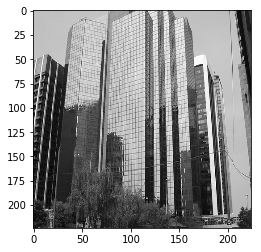

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


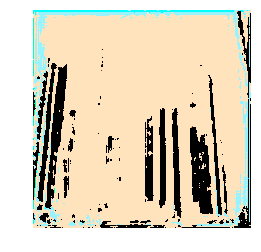

XMAX 254.12043535156246


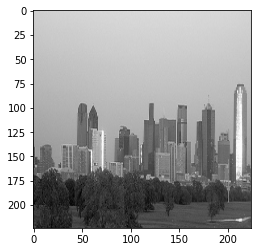

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


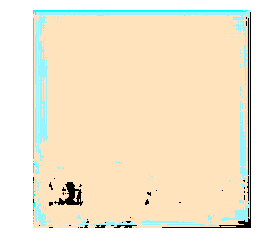

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


XMAX 255.00000000000003


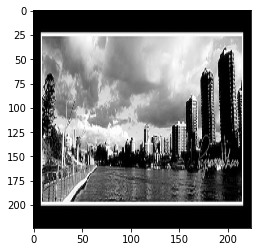

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


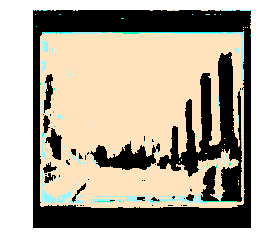

XMAX 253.57984965122256


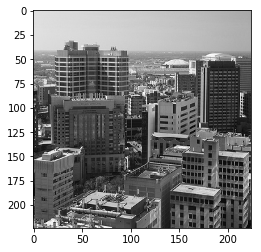

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


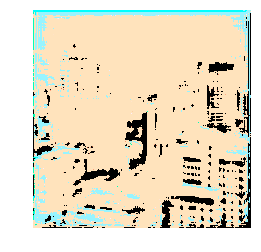

XMAX 247.06740526148337


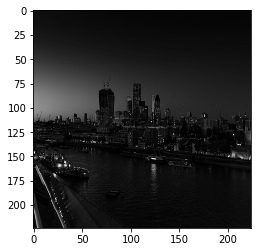

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


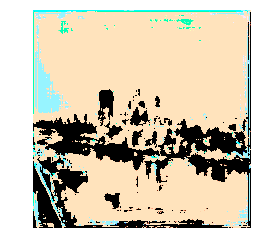

XMAX 252.35292906169798


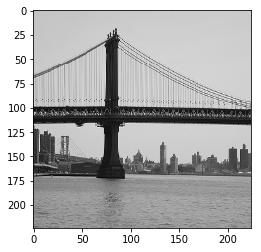

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


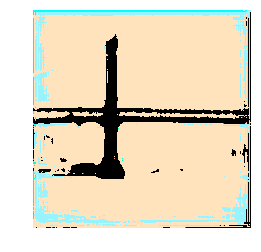

XMAX 252.70695008769133


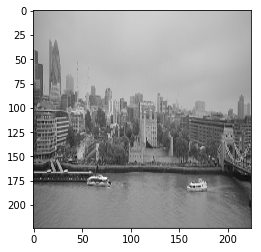

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


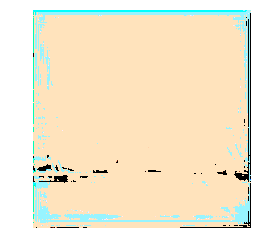

XMAX 253.06926472217552


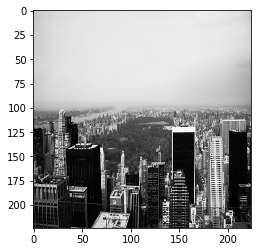

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


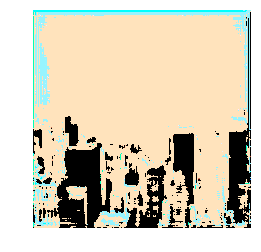

XMAX 225.91638115433523


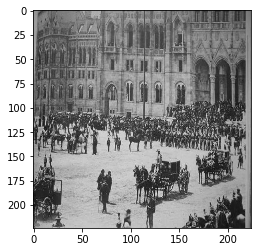

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


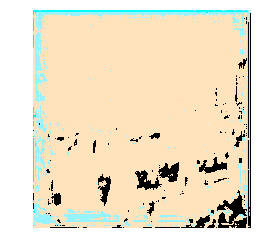

XMAX 244.5979338867186


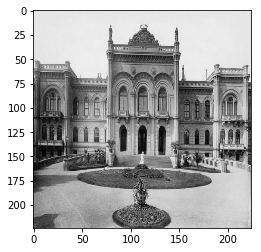

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


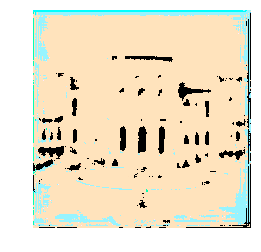

XMAX 255.0


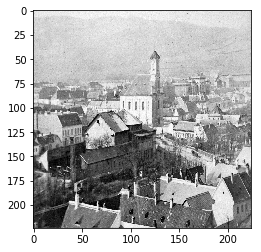

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


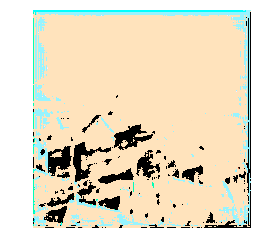

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


XMAX 255.00000000000003


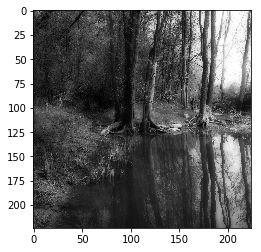

float64
min r:  0.0
max r:  1.0
min g:  0.0
max g:  1.0
min b:  0.0
max b:  1.0


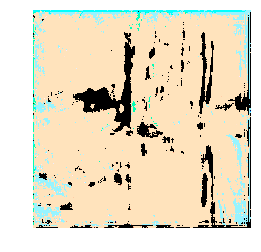

In [22]:
from matplotlib.pyplot import imshow
from skimage import color
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import transform, io, color

from importlib import reload  # Python 3.4+ only.
import streaming_data
streaming_data = reload(streaming_data)

root_pictures = 'O:/ProgrammingSoftwares/anaconda_projects/dp_nagyhazi/tests/unet/'
watcher = streaming_unet_data.StreamingUnet_DataGenerator(image_folder,batch_size=1, random_trf= False)

for idx in range(len(watcher)):
    X,Y = watcher[idx]
    print('XMAX', np.max(X))
    plt.imshow(watcher.gray_img[0]/255)
    plt.show()
    print(Y.dtype)
    rgb_img = conc_pred(model2, X, watcher)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.savefig(root_pictures + 'test_img'+str(idx)+'.png', bbox_inches='tight')
    plt.show()

In [20]:
def conc_pred(model, X, watcher, Y = None):
    y_real = model.predict(X)[0]
    if (Y is not None):
        y_real = Y
    y_real = y_real.astype(np.float64)
    y_real = np.clip(y_real,-1,1)
    y_real[:,:,0] *= 100
    y_real[:,:,1] = (y_real[:,:,1] - 0.5) * 70
    y_real[:,:,2] = (y_real[:,:,2] - 0.5) * 70
    
    rgb_img = color.lab2rgb(y_real)
    print('min r: ',np.min(rgb_img[:,:,0]))
    print('max r: ',np.max(rgb_img[:,:,0]))
    print('min g: ',np.min(rgb_img[:,:,1]))
    print('max g: ',np.max(rgb_img[:,:,1]))
    print('min b: ',np.min(rgb_img[:,:,2]))
    print('max b: ',np.max(rgb_img[:,:,2]))
    
    return rgb_img